In [23]:
import numpy   as np
import pandas  as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA, TruncatedSVD

In [2]:
import pickle

In [3]:
from sklearn.preprocessing import StandardScaler

---

### Large Pickled Dataset



In [4]:
df = pd.read_pickle("fiveCats.pkl")

In [5]:
X_df = df.drop('category', axis=1)
y_df = df['category']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.3)

In [7]:
X_train.shape

(517403, 11)

In [8]:
X_test.shape

(221745, 11)

---

### Manipulate data sets

In [9]:
m_termTrans = pickle.load(open('pkl_tfidf.p','rb'))
m_scaler = pickle.load(open('pkl_scaler.p','rb'))
m_svd = pickle.load(open('pkl_svd.p','rb'))
m_kmeans = pickle.load(open('pkl_kmeans.p','rb'))

#### Vectorize Review Text

In [10]:
X_train_term  = m_termTrans.transform(X_train['text'])

In [11]:
X_train_term.shape

(517403, 153378)

#### Scale Sparse Matrix

In [12]:
m_scaler = pickle.load(open('pkl_scaler.p','rb'))

In [13]:
X_train_term = m_scaler.fit_transform(X_train_term)

In [14]:
# sklearn.preprocessing.MaxAbsScaler 
# it is okay to have large scales

#### Reduce Dimensionality

In [47]:
X_train_term_svd = m_svd.transform(X_train_term)

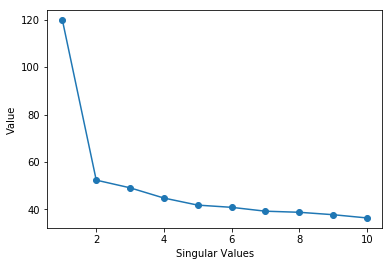

In [48]:
s = m_svd.singular_values_

x = [i+1 for i in range(len(s))]
plt.plot(x, s, marker='o')
plt.xlabel("Singular Values")
plt.ylabel("Value");

*  Percentage of Variance Explained

In [17]:
m_svd.explained_variance_ratio_.sum()*100

3.561945735071194

#### Cluster Reviews

In [24]:
X_test_term = m_termTrans.transform(X_test['text'])

In [25]:
X_test_term_scaled = m_scaler.transform(X_test_term)

In [26]:
X_test_term_svd = m_svd.transform(X_test_term_scaled)

In [27]:
X_test_term_svd.shape

(221745, 10)

In [28]:
pred = m_kmeans.predict(X_test_term_svd)

#### Visualize Clusters

In [31]:
def catPred(kmObj, gTrue, pred): 
    '''
        kmObjn: a kmeans object
        gTrue: true categories (ground truth)
    '''
    fig, ax = plt.subplots(nrows=1, ncols=5, sharey=True, figsize=(50,12))

    numClusters = kmObj.get_params()['n_clusters']
    
    for i in range(numClusters):
        mask = (pred == i)
        val = np.unique( gTrue[mask], return_counts=True)
        lbl = val[0]
        ht  = val[1] / val[1].sum()
        ax[i].bar(range(numClusters), height=ht, tick_label = lbl)
        ax[i].set_xticklabels(lbl, fontsize=20)
        ax[i].set_title(i, fontsize=20)

        ax[0].set_yticklabels(["0", "0.2", "0.4", "0.6", "0.8"], fontsize=20)
        ax[0].set_ylabel("Proportion", fontsize = 32);
        plt.suptitle("Proportion of Categories in each Clusterc", fontsize = 32);

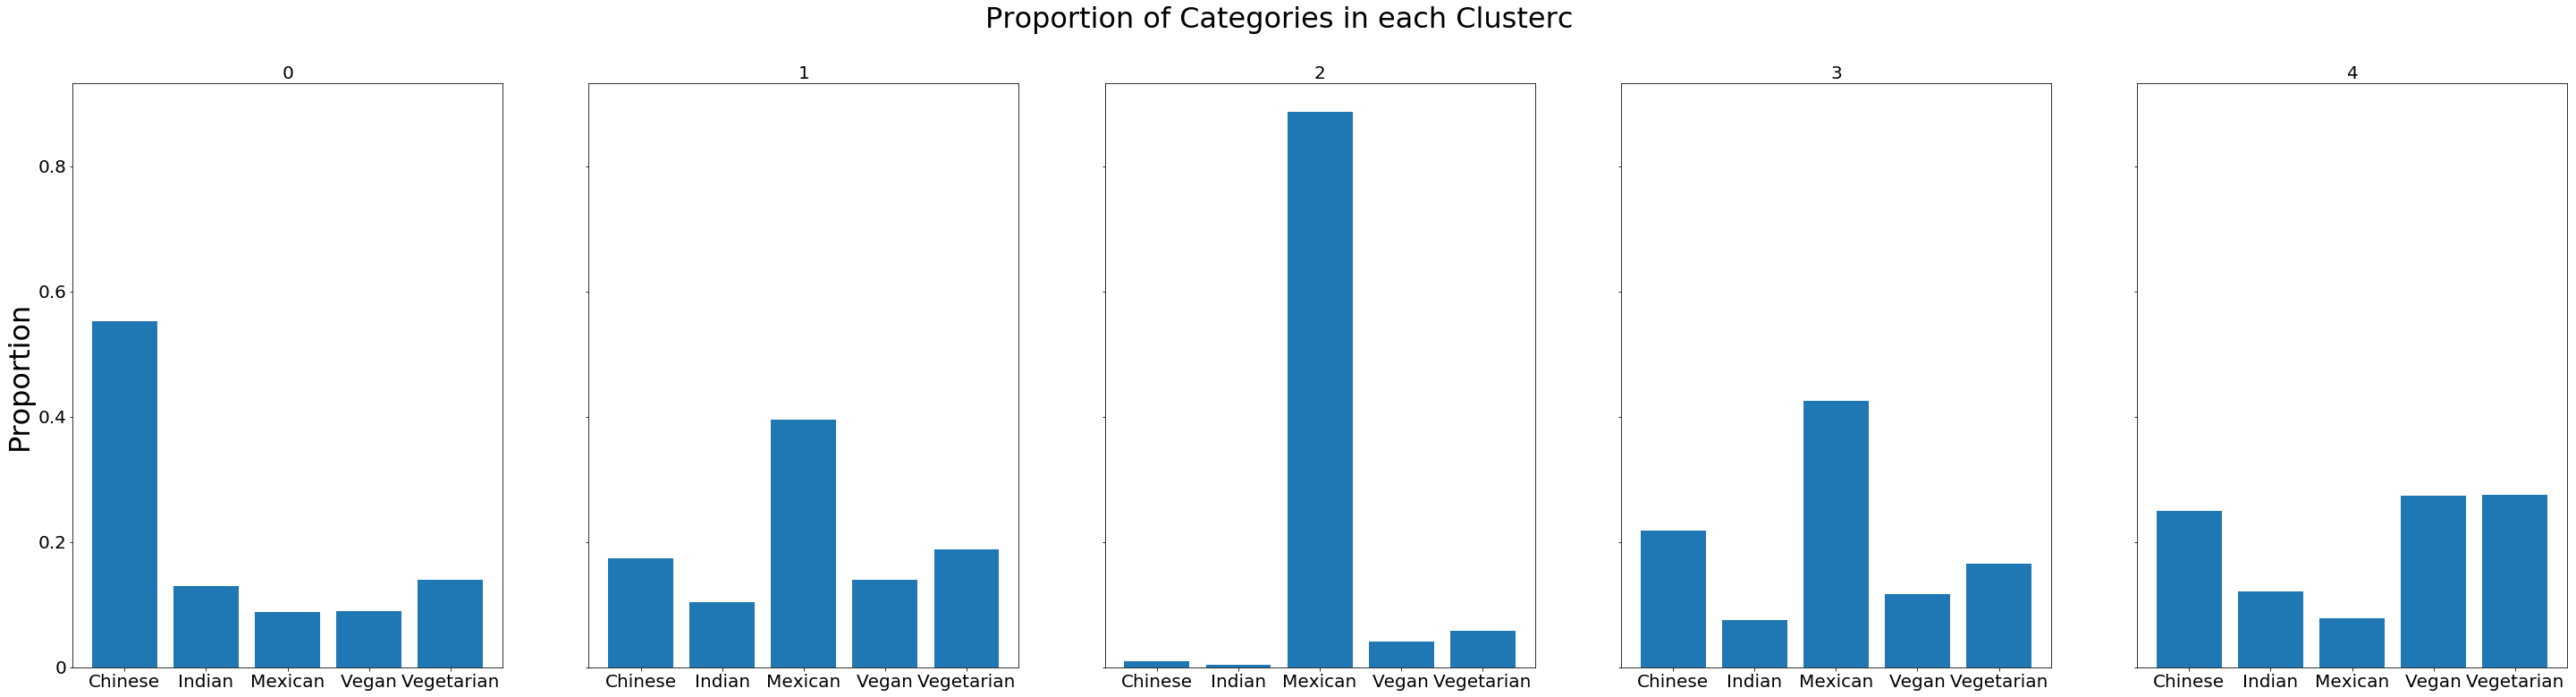

In [32]:
catPred(m_kmeans, y_test, pred)

#### Test Set: Class Balance

In [43]:
y_test.value_counts()

Mexican       90444
Chinese       59062
Vegetarian    31688
Vegan         22106
Indian        18445
Name: category, dtype: int64

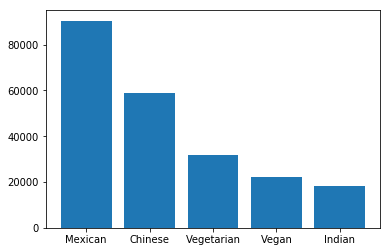

In [41]:
x = y_test.value_counts().values
lbls = list(y_test.value_counts().index)
plt.bar(range(len(x)), height=x, tick_label = lbls);

#### Train Set: Class Balance

In [45]:
y_train.value_counts()

Mexican       211433
Chinese       137960
Vegetarian     74102
Vegan          51347
Indian         42561
Name: category, dtype: int64

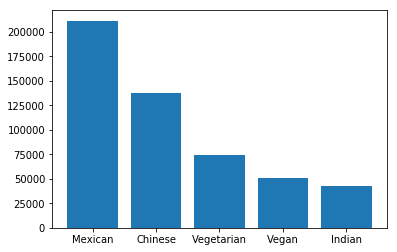

In [46]:
x = y_train.value_counts().values
lbls = list(y_train.value_counts().index)
plt.bar(range(len(x)), height=x, tick_label = lbls);

In [49]:
pred2 = m_kmeans.predict(X_train_term_svd)

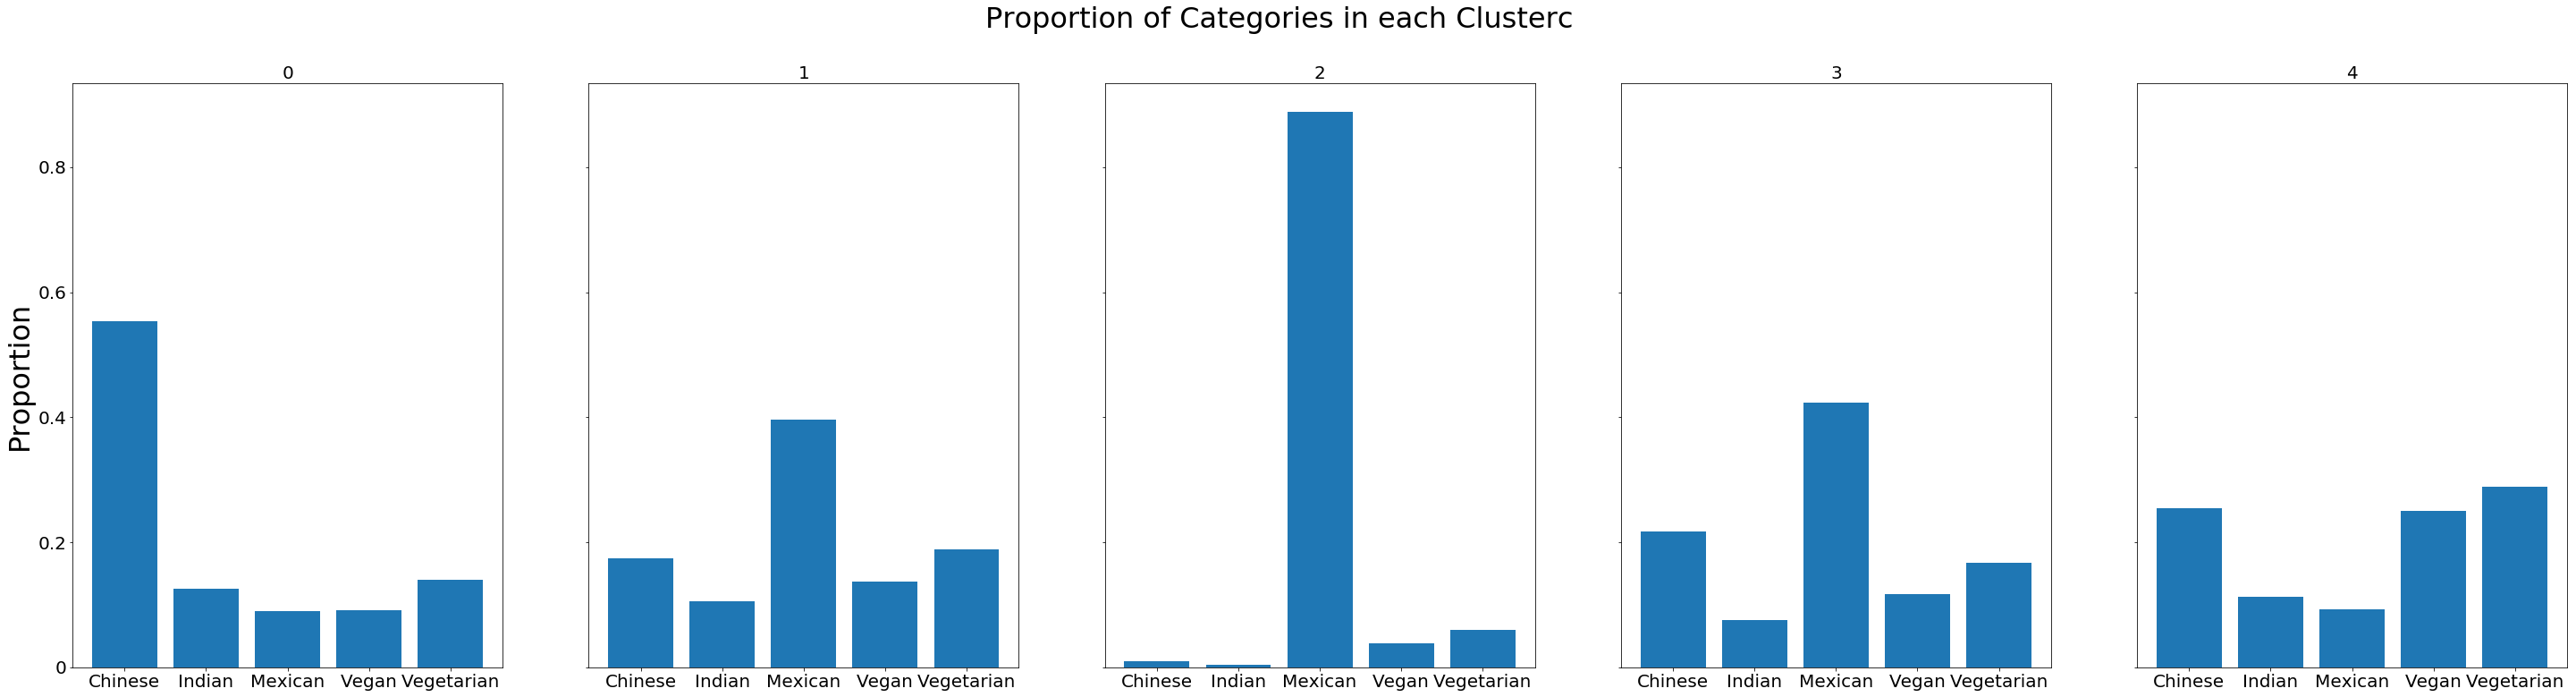

In [50]:
catPred(m_kmeans, y_train, pred2)